<a href="https://colab.research.google.com/github/AP-047/RClass-Classification-by-Rational-Approximation/blob/main/notebooks/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Import: MNIST**

**Load MNIST dataset**

In [1]:
from keras.datasets import mnist

**Load the training and testing sets into separate variables**

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

**Check split ratio of the dataset**

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


**Plot the dataset (step zero)**

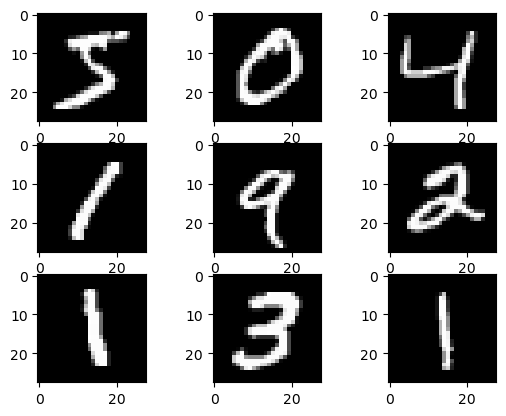

In [4]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(331 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

### **Training Dataset Overview**

**Counting the number of images for each digit (0–9) in the training dataset to understand class distribution**

Number of images for each digit in the training set:
Digit 0: 5923 images
Digit 1: 6742 images
Digit 2: 5958 images
Digit 3: 6131 images
Digit 4: 5842 images
Digit 5: 5421 images
Digit 6: 5918 images
Digit 7: 6265 images
Digit 8: 5851 images
Digit 9: 5949 images


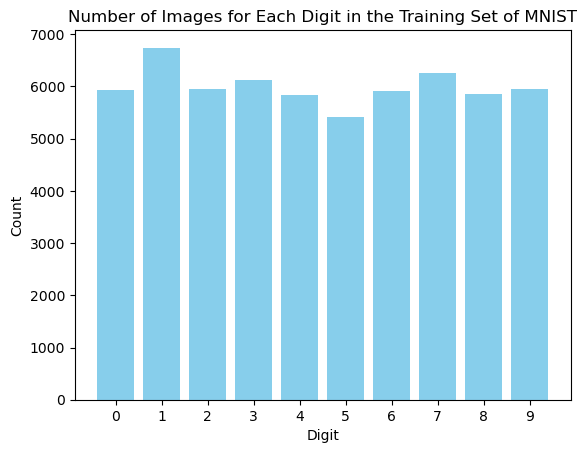

In [23]:
import numpy as np
import matplotlib.pyplot as plt
unique, counts = np.unique(train_y, return_counts=True)
digit_counts = dict(zip(unique, counts))

print("Number of images for each digit in the training set:")
for digit, count in digit_counts.items():
    print(f"Digit {digit}: {count} images")
plt.bar(digit_counts.keys(), digit_counts.values(), color='skyblue', label='Training Data')
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Number of Images for Each Digit in the Training Set of MNIST")
plt.xticks(range(10))  # Set x-ticks to display digits 0-9
plt.show()

### **Data Analysis - with thresholding**

**Thresholding: Convert MNIST Images to Black and White**

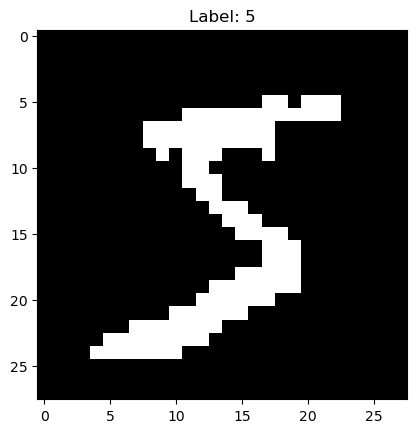

In [7]:
# Threshold value of 128 (middle of the 0-255 range for grayscale)
threshold = 128

# Convert the training and testing images to black-and-white
train_X_bw = (train_X >= threshold).astype(int)
test_X_bw = (test_X >= threshold).astype(int)

# Display a sample image to verify conversion
import matplotlib.pyplot as plt
plt.imshow(train_X_bw[0], cmap='gray')
plt.title(f"Label: {train_y[0]}")
plt.show()

**1. Avg. Values**

*Finding the average number of active pixels (1s) for each digit (0–9) across all training images*

Average number of active (white) pixels for each digit in the training set:
Digit 0: 137.55 pixels
Digit 1: 60.21 pixels
Digit 2: 118.23 pixels
Digit 3: 112.46 pixels
Digit 4: 95.94 pixels
Digit 5: 102.16 pixels
Digit 6: 109.09 pixels
Digit 7: 90.70 pixels
Digit 8: 119.62 pixels
Digit 9: 97.31 pixels


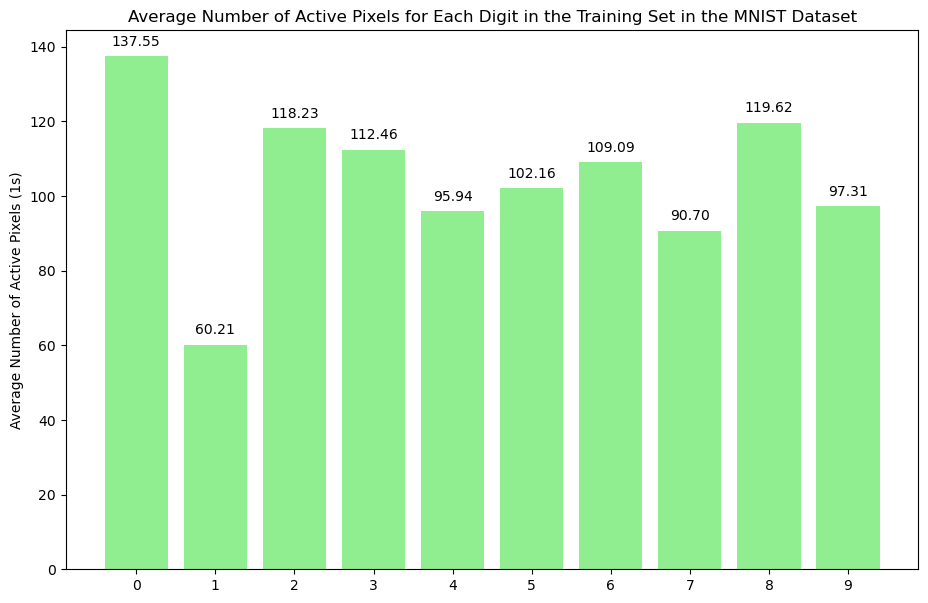

In [48]:
# Initialize a dictionary to store the average number of active pixels for each digit
average_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # Sum the active pixels (1s) for each image, then calculate the average
    average_active_pixels[digit] = digit_images.sum(axis=(1, 2)).mean()  # Summing pixels per image and averaging

# Display the average active pixels for each digit
print("Average number of active (white) pixels for each digit in the training set:")
for digit, avg_pixels in average_active_pixels.items():
    print(f"Digit {digit}: {avg_pixels:.2f} pixels")
import matplotlib.pyplot as plt

# Plotting the average number of active pixels for each digit
plt.figure(figsize=(11, 7))
plt.bar(average_active_pixels.keys(), average_active_pixels.values(), color='lightgreen')
for digit, avg_pixels in average_active_pixels.items():
    plt.text(digit, avg_pixels + 2, f'{avg_pixels:.2f}', ha='center', va='bottom')
plt.ylabel("Average Number of Active Pixels (1s)")
plt.title("Average Number of Active Pixels for Each Digit in the Training Set in the MNIST Dataset")
plt.xticks(range(10))  # Set x-ticks to display digits 0-9
plt.show()

**2. Row-wise**

*Calculate Unique Feature Value for Each Digit in Training Data Using Index-Based Coefficients*

In [10]:
# Initialize a dictionary to store the average unique feature value for each digit
average_unique_feature = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the unique feature values for each image of the current digit
    unique_feature_values = []

    for img in digit_images:
        # Calculate the weighted sum for the entire image
        total_sum = 0
        for row_index, row in enumerate(img):
            for col_index, pixel in enumerate(row):
                if pixel == 1:  # Only consider active pixels
                    # Create the two-digit coefficient by combining row and column indices
                    coefficient = (row_index + 1) * 10 + (col_index + 1)
                    total_sum += coefficient * pixel  # Multiply by 1 (since pixel is active)

        # Store the unique feature value for this image
        unique_feature_values.append(total_sum)

    # Calculate the average unique feature value for this digit
    average_unique_feature[digit] = np.mean(unique_feature_values)

# Display the average unique feature values for each digit
print("Average unique feature value for each digit in the training set:")
for digit, avg_value in average_unique_feature.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average unique feature value for each digit in the training set:
Digit 0: 22704.74
Digit 1: 9911.94
Digit 2: 19515.57
Digit 3: 18549.44
Digit 4: 15840.15
Digit 5: 16863.15
Digit 6: 18026.70
Digit 7: 14946.21
Digit 8: 19742.32
Digit 9: 16025.24


**3. Column-wise**

*Calculate Unique Feature Value for Each Digit in Training Data Using Index-Based Coefficients*

In [11]:
# Initialize a dictionary to store the average unique feature value for each digit
average_unique_feature_column_wise = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the unique feature values for each image of the current digit
    unique_feature_values = []

    for img in digit_images:
        # Calculate the weighted sum for the entire image, column-wise
        total_sum = 0
        for col_index in range(img.shape[1]):  # Loop through columns
            col_sum = 0
            for row_index, pixel in enumerate(img[:, col_index]):
                if pixel == 1:  # Only consider active pixels
                    # Create the two-digit coefficient by combining row and column indices
                    coefficient = (row_index + 1) * 10 + (col_index + 1)
                    col_sum += coefficient * pixel  # Multiply by 1 (since pixel is active)

            # Add the column sum to the total sum for the image
            total_sum += col_sum

        # Store the unique feature value for this image
        unique_feature_values.append(total_sum)

    # Calculate the average unique feature value for this digit
    average_unique_feature_column_wise[digit] = np.mean(unique_feature_values)

# Display the average unique feature values for each digit
print("Average unique feature value for each digit (column-wise) in the training set:")
for digit, avg_value in average_unique_feature_column_wise.items():
    print(f"Digit {digit}: {avg_value:.2f}")


Average unique feature value for each digit (column-wise) in the training set:
Digit 0: 22704.74
Digit 1: 9911.94
Digit 2: 19515.57
Digit 3: 18549.44
Digit 4: 15840.15
Digit 5: 16863.15
Digit 6: 18026.70
Digit 7: 14946.21
Digit 8: 19742.32
Digit 9: 16025.24


**4. Top half**

*Calculate the Sum of Active Pixels in the Top Half for Each Digit in the Training Data*

In [12]:
# Initialize a dictionary to store the average sum of active pixels in the top half for each digit
average_top_half_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the top half sums for each image of the current digit
    top_half_sums = []

    for img in digit_images:
        # Take the top half of the image (first 14 rows)
        top_half = img[:14, :]

        # Sum the active pixels in the top half
        top_half_sum = top_half.sum()
        top_half_sums.append(top_half_sum)

    # Calculate the average sum of active pixels in the top half for this digit
    average_top_half_active_pixels[digit] = np.mean(top_half_sums)

# Display the average sum of active pixels in the top half for each digit
print("Average sum of active pixels in the top half for each digit in the training set:")
for digit, avg_value in average_top_half_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the top half for each digit in the training set:
Digit 0: 65.97
Digit 1: 28.54
Digit 2: 48.24
Digit 3: 55.09
Digit 4: 41.82
Digit 5: 50.24
Digit 6: 43.07
Digit 7: 49.62
Digit 8: 58.65
Digit 9: 48.29


**5. Bottom Half**

*Calculate the Sum of Active Pixels in the Bottom Half for Each Digit in the Training Data*

In [13]:
# Initialize a dictionary to store the average sum of active pixels in the bottom half for each digit
average_bottom_half_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the bottom half sums for each image of the current digit
    bottom_half_sums = []

    for img in digit_images:
        # Take the bottom half of the image (last 14 rows)
        bottom_half = img[14:, :]

        # Sum the active pixels in the bottom half
        bottom_half_sum = bottom_half.sum()
        bottom_half_sums.append(bottom_half_sum)

    # Calculate the average sum of active pixels in the bottom half for this digit
    average_bottom_half_active_pixels[digit] = np.mean(bottom_half_sums)

# Display the average sum of active pixels in the bottom half for each digit
print("Average sum of active pixels in the bottom half for each digit in the training set:")
for digit, avg_value in average_bottom_half_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the bottom half for each digit in the training set:
Digit 0: 71.59
Digit 1: 31.66
Digit 2: 69.99
Digit 3: 57.37
Digit 4: 54.12
Digit 5: 51.92
Digit 6: 66.02
Digit 7: 41.07
Digit 8: 60.97
Digit 9: 49.02


**6. Left half**

*Calculating the average sum of active pixels for the left half of each image for each digit*

In [14]:
# Initialize a dictionary to store the average sum of active pixels in the left half for each digit
average_left_half_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the left half sums for each image of the current digit
    left_half_sums = []

    for img in digit_images:
        # Take the left half of the image (first 14 columns)
        left_half = img[:, :14]

        # Sum the active pixels in the left half
        left_half_sum = left_half.sum()
        left_half_sums.append(left_half_sum)

    # Calculate the average sum of active pixels in the left half for this digit
    average_left_half_active_pixels[digit] = np.mean(left_half_sums)

# Display the average sum of active pixels in the left half for each digit
print("Average sum of active pixels in the left half for each digit in the training set:")
for digit, avg_value in average_left_half_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the left half for each digit in the training set:
Digit 0: 65.81
Digit 1: 23.58
Digit 2: 52.99
Digit 3: 47.37
Digit 4: 42.35
Digit 5: 48.33
Digit 6: 52.43
Digit 7: 37.33
Digit 8: 56.17
Digit 9: 40.78


**7. Right half**

*Calculating the average sum of active pixels for the right half of each image for each digit*

In [15]:
# Initialize a dictionary to store the average sum of active pixels in the right half for each digit
average_right_half_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the right half sums for each image of the current digit
    right_half_sums = []

    for img in digit_images:
        # Take the right half of the image (last 14 columns)
        right_half = img[:, 14:]

        # Sum the active pixels in the right half
        right_half_sum = right_half.sum()
        right_half_sums.append(right_half_sum)

    # Calculate the average sum of active pixels in the right half for this digit
    average_right_half_active_pixels[digit] = np.mean(right_half_sums)

# Display the average sum of active pixels in the right half for each digit
print("Average sum of active pixels in the right half for each digit in the training set:")
for digit, avg_value in average_right_half_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the right half for each digit in the training set:
Digit 0: 71.75
Digit 1: 36.63
Digit 2: 65.24
Digit 3: 65.08
Digit 4: 53.59
Digit 5: 53.83
Digit 6: 56.66
Digit 7: 53.37
Digit 8: 63.44
Digit 9: 56.53


**8. First quadrant (top-left)**

*Calculating the average sum of active pixels for the first quadrant (top-left) of each image for each digit*

In [16]:
# Initialize a dictionary to store the average sum of active pixels in the first quadrant for each digit
average_first_quadrant_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the first quadrant sums for each image of the current digit
    first_quadrant_sums = []

    for img in digit_images:
        # Take the first quadrant of the image (first 14 rows and first 14 columns)
        first_quadrant = img[:14, :14]

        # Sum the active pixels in the first quadrant
        first_quadrant_sum = first_quadrant.sum()
        first_quadrant_sums.append(first_quadrant_sum)

    # Calculate the average sum of active pixels in the first quadrant for this digit
    average_first_quadrant_active_pixels[digit] = np.mean(first_quadrant_sums)

# Display the average sum of active pixels in the first quadrant for each digit
print("Average sum of active pixels in the first quadrant for each digit in the training set:")
for digit, avg_value in average_first_quadrant_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the first quadrant for each digit in the training set:
Digit 0: 26.48
Digit 1: 4.93
Digit 2: 16.59
Digit 3: 22.18
Digit 4: 18.88
Digit 5: 23.29
Digit 6: 21.33
Digit 7: 21.84
Digit 8: 22.86
Digit 9: 20.88


**8. Second quadrant (top-right)**

*Calculating the average sum of active pixels for the second quadrant (top-right) of each image for each digit*

In [17]:
# Initialize a dictionary to store the average sum of active pixels in the second quadrant for each digit
average_second_quadrant_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the second quadrant sums for each image of the current digit
    second_quadrant_sums = []

    for img in digit_images:
        # Take the second quadrant of the image (first 14 rows and last 14 columns)
        second_quadrant = img[:14, 14:]

        # Sum the active pixels in the second quadrant
        second_quadrant_sum = second_quadrant.sum()
        second_quadrant_sums.append(second_quadrant_sum)

    # Calculate the average sum of active pixels in the second quadrant for this digit
    average_second_quadrant_active_pixels[digit] = np.mean(second_quadrant_sums)

# Display the average sum of active pixels in the second quadrant for each digit
print("Average sum of active pixels in the second quadrant for each digit in the training set:")
for digit, avg_value in average_second_quadrant_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the second quadrant for each digit in the training set:
Digit 0: 39.49
Digit 1: 23.61
Digit 2: 31.65
Digit 3: 32.90
Digit 4: 22.94
Digit 5: 26.95
Digit 6: 21.74
Digit 7: 27.78
Digit 8: 35.79
Digit 9: 27.41


**9. Third quadrant (bottom-left)**

*Calculating the average sum of active pixels for the third quadrant (bottom-left) of each image for each digit*

In [18]:
# Initialize a dictionary to store the average sum of active pixels in the third quadrant for each digit
average_third_quadrant_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the third quadrant sums for each image of the current digit
    third_quadrant_sums = []

    for img in digit_images:
        # Take the third quadrant of the image (last 14 rows and first 14 columns)
        third_quadrant = img[14:, :14]

        # Sum the active pixels in the third quadrant
        third_quadrant_sum = third_quadrant.sum()
        third_quadrant_sums.append(third_quadrant_sum)

    # Calculate the average sum of active pixels in the third quadrant for this digit
    average_third_quadrant_active_pixels[digit] = np.mean(third_quadrant_sums)

# Display the average sum of active pixels in the third quadrant for each digit
print("Average sum of active pixels in the third quadrant for each digit in the training set:")
for digit, avg_value in average_third_quadrant_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the third quadrant for each digit in the training set:
Digit 0: 39.33
Digit 1: 18.65
Digit 2: 36.40
Digit 3: 25.19
Digit 4: 23.47
Digit 5: 25.04
Digit 6: 31.09
Digit 7: 15.49
Digit 8: 33.32
Digit 9: 19.90


**10. Fourth quadrant (bottom-right)**

*Calculating the average sum of active pixels for the fourth quadrant (bottom-right) of each image for each digit*

In [19]:
# Initialize a dictionary to store the average sum of active pixels in the fourth quadrant for each digit
average_fourth_quadrant_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the fourth quadrant sums for each image of the current digit
    fourth_quadrant_sums = []

    for img in digit_images:
        # Take the fourth quadrant of the image (last 14 rows and last 14 columns)
        fourth_quadrant = img[14:, 14:]

        # Sum the active pixels in the fourth quadrant
        fourth_quadrant_sum = fourth_quadrant.sum()
        fourth_quadrant_sums.append(fourth_quadrant_sum)

    # Calculate the average sum of active pixels in the fourth quadrant for this digit
    average_fourth_quadrant_active_pixels[digit] = np.mean(fourth_quadrant_sums)

# Display the average sum of active pixels in the fourth quadrant for each digit
print("Average sum of active pixels in the fourth quadrant for each digit in the training set:")
for digit, avg_value in average_fourth_quadrant_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")

Average sum of active pixels in the fourth quadrant for each digit in the training set:
Digit 0: 32.26
Digit 1: 13.02
Digit 2: 33.59
Digit 3: 32.18
Digit 4: 30.65
Digit 5: 26.88
Digit 6: 34.92
Digit 7: 25.59
Digit 8: 27.65
Digit 9: 29.12


**11. Two Diagonals**

In [20]:
# Initialize a dictionary to store the average diagonal sum of active pixels for each digit
average_diagonal_active_pixels = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the diagonal sums for each image of the current digit
    diagonal_sums = []

    for img in digit_images:
        # Sum of active pixels on the main diagonal (top-left to bottom-right)
        main_diagonal_sum = sum(img[i, i] for i in range(min(img.shape)))

        # Sum of active pixels on the anti-diagonal (top-right to bottom-left)
        anti_diagonal_sum = sum(img[i, img.shape[1] - i - 1] for i in range(min(img.shape)))

        # Total diagonal sum for this image
        total_diagonal_sum = main_diagonal_sum + anti_diagonal_sum
        diagonal_sums.append(total_diagonal_sum)

    # Calculate the average sum of active pixels on both diagonals for this digit
    average_diagonal_active_pixels[digit] = np.mean(diagonal_sums)

# Display the average sum of active pixels on both diagonals for each digit
print("Average sum of active pixels on both diagonals for each digit in the training set:")
for digit, avg_value in average_diagonal_active_pixels.items():
    print(f"Digit {digit}: {avg_value:.2f}")


Average sum of active pixels on both diagonals for each digit in the training set:
Digit 0: 9.37
Digit 1: 7.66
Digit 2: 12.24
Digit 3: 12.28
Digit 4: 10.46
Digit 5: 10.62
Digit 6: 9.69
Digit 7: 7.63
Digit 8: 14.01
Digit 9: 10.07


**12. Middle Portion**

In [21]:
import numpy as np

# Initialize a dictionary to store the average active pixel count for each digit
average_middle_region_sum = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Get all images of the current digit
    digit_images = train_X_bw[train_y == digit]

    # List to store the middle region sums for each image of the current digit
    middle_region_sums = []

    for img in digit_images:
        # Define the 7x7 middle region (central part)
        start = 11  # Starting index for both rows and columns
        end = 18   # Ending index for both rows and columns

        # Extract the 7x7 middle region
        middle_region = img[start:end, start:end]

        # Calculate the sum of active pixels (1s) in the middle region
        middle_sum = middle_region.sum()
        middle_region_sums.append(middle_sum)

    # Calculate the average active pixel count for the middle region for this digit
    average_middle_region_sum[digit] = np.mean(middle_region_sums)

# Display the average middle region active pixel count for each digit
print("Average number of active pixels in the 7x7 middle region for each digit:")
for digit, avg_value in average_middle_region_sum.items():
    print(f"Digit {digit}: {avg_value:.2f}")


Average number of active pixels in the 7x7 middle region for each digit:
Digit 0: 6.07
Digit 1: 21.60
Digit 2: 21.57
Digit 3: 23.52
Digit 4: 25.27
Digit 5: 19.09
Digit 6: 22.28
Digit 7: 15.87
Digit 8: 29.73
Digit 9: 24.39


### **Data Analysis - without thresholding**

Average Pixel Value

Average pixel value for each digit:
Digit 0: 44.22
Digit 1: 19.38
Digit 2: 37.99
Digit 3: 36.09
Digit 4: 30.95
Digit 5: 32.83
Digit 6: 35.01
Digit 7: 29.20
Digit 8: 38.29
Digit 9: 31.26


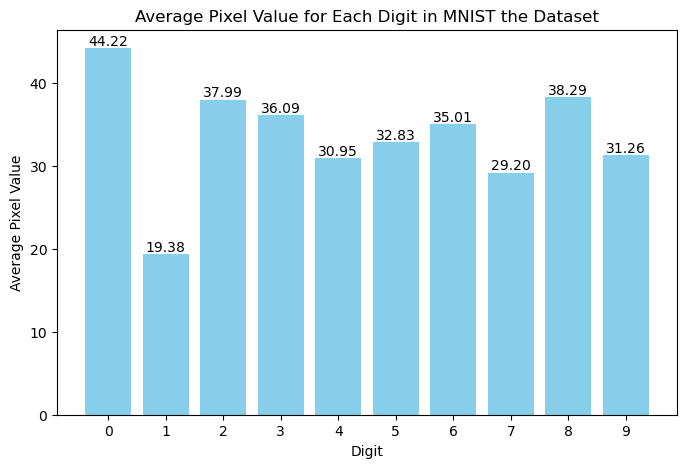

In [47]:
# prompt: I want to find average pixel value of for the images of each digit, without converting them into black and white

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Calculate average pixel value for each digit
average_pixel_values = {}
for digit in range(10):
    digit_images = train_X[train_y == digit]
    average_pixel_values[digit] = np.mean(digit_images)

# Print the results
print("Average pixel value for each digit:")
for digit, avg_pixel_value in average_pixel_values.items():
    print(f"Digit {digit}: {avg_pixel_value:.2f}")

# Plotting the average pixel values
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.bar(average_pixel_values.keys(), average_pixel_values.values(), color='skyblue')
for digit, avg_pixel_value in average_pixel_values.items():
    plt.text(digit, avg_pixel_value, f"{avg_pixel_value:.2f}", ha='center', va='bottom')
plt.xlabel("Digit")
plt.ylabel("Average Pixel Value")
plt.title("Average Pixel Value for Each Digit in MNIST the Dataset")
plt.xticks(range(10))  # Set x-ticks to display digits 0-9
plt.show()